In [3]:
import winsound
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftshift
import sounddevice as sd
from scipy.io import wavfile

In [31]:
def generateSin(freq, amplitude, time, fs):
        n = time*fs
        x = np.linspace(0, time, n)
        s = amplitude*np.sin(freq*x*2*np.pi)
        return (x, s)

In [32]:
dict_frequencies = {}
dict_frequencies[0] = [941, 1336]
dict_frequencies[1] = [697, 1209]
dict_frequencies[2] = [697, 1336]
dict_frequencies[3] = [697, 1477]
dict_frequencies[4] = [770, 1209]
dict_frequencies[5] = [770, 1336]
dict_frequencies[6] = [770, 1477]
dict_frequencies[7] = [859, 1209]
dict_frequencies[8] = [859, 1336]
dict_frequencies[9] = [859, 1477]

gross_values = [697, 770, 859, 941, 1209, 1336, 1477]

In [33]:
num = int(input("Escolha um número de 0 a 9:  "))
num_samples = 48000
duration = 6
F = 1
T = 1
t = np.linspace(-T, T, T*num_samples)

Escolha um número de 0 a 9:  5


In [34]:
freq1 = dict_frequencies[num][0]
freq2 = dict_frequencies[num][1]

t, sin1 = generateSin(freq1, T, F, num_samples)
t, sin2 = generateSin(freq2, T, F, num_samples)

print(f"Frequências: {freq1}, {freq2}")

sd.default.samplerate = num_samples 
sd.default.channels = 1

Frequências: 770, 1336


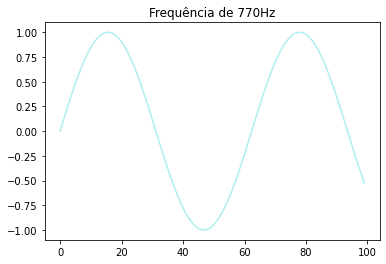

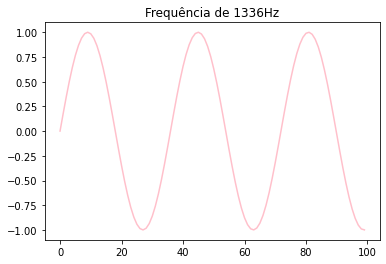

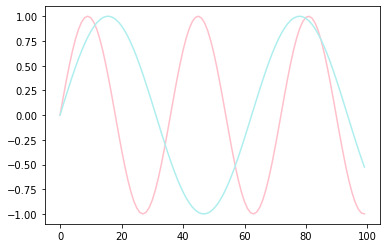

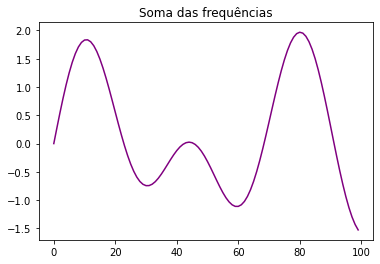

In [35]:
# Primeira frequência
plt.title(f"Frequência de {freq1}Hz")
plt.plot(sin1[:100], color="#afeeee")
plt.show()

# Segunda frequência
plt.title(f"Frequência de {freq2}Hz")
plt.plot(sin2[:100], color="pink")
plt.show()

plt.figure()
plt.plot(sin2[:100], color="pink")
plt.plot(sin1[:100], color="#afeeee")
plt.show()

a3 = sin1 + sin2

plt.title("Soma das frequências")
plt.plot(a3[:100], color="purple")
plt.show()

In [36]:
sd.default.samplerate = num_samples
sd.default.channels = 1
myrecording = sd.playrec(a3)

In [37]:
sd.play(myrecording)

### Fazendo a transformada 

In [4]:
from scipy import signal as window

def calcFFT(signal, fs):
        # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
        N  = len(signal)
        W = window.hamming(N)
        T  = 1/fs
        xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
        yf = fft(signal*W)
        return(xf, np.abs(yf[0:N//2]))

def plotFFT(signal, fs):
    global y_points
    x,y = calcFFT(signal, fs)
    plt.figure()
    plt.plot(x, np.abs(y), color="orange")
    plt.title('Fourier')
    y_points = np.abs(y)
    

NameError: name 't' is not defined

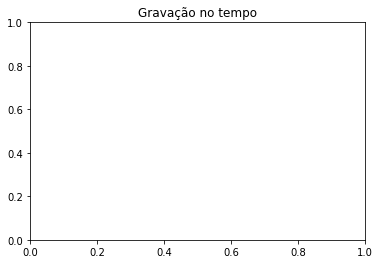

In [5]:
plt.title("Gravação no tempo")
plt.plot(t, myrecording)

In [6]:
plotFFT(myrecording[:, 0], num_samples)
print(y_points)

NameError: name 'myrecording' is not defined

### Achando os picos

[2579.29641607 3029.18378599]


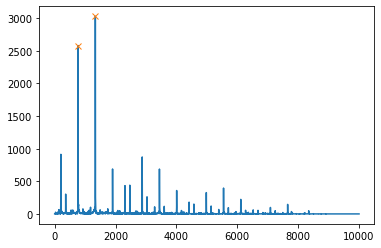

[ 770 1336]
2


In [41]:
from scipy.signal import find_peaks
plt.figure()
peaks, _ = find_peaks(y_points, height=0, threshold=400)
plt.plot(y_points[:10000])
plt.plot(peaks, y_points[peaks], "x")
print(y_points[peaks])
plt.show()
print(peaks)
print(len(peaks))

In [43]:
list_high_peaks = []
for item in peaks:
        prox = min(gross_values, key=lambda x:abs(x-item))
        print(prox)
        list_high_peaks.append(prox)

770
1336


In [44]:
for key, value in dict_frequencies.items():
        if value[0] == list_high_peaks[0] and value[1] == list_high_peaks[1]:
            print(f"Número esperado: {num}")
            print(f"Número encontrado: {key}")

Número esperado: 5
Número encontrado: 5
